In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle
import matplotx
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])
%matplotlib inline

## Load results

In [29]:
all_out = glob("out/**/*.pkl")

In [30]:
all_out = [load_pickle(p) for p in all_out]

In [31]:
all_out[0]

{'num_classes': 2,
 'num_train_points': 20,
 'accuracy': 0.49,
 'acc_macro': 0.49,
 'racc': 0.5,
 'kappa': -0.020000000000000018,
 'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]),
 'f1_macro': 0.48872180451127817,
 'f1_micro': 0.49,
 'frac_valid': 1.0,
 'all_y_true': (#100) [1,1,1,1,0,1,1,0,0,0...],
 'all_y_pred': (#100) [0,0,1,0,1,1,1,0,0,1...],
 'valid_indices': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 'might_have_rounded_floats': Fal

In [32]:
extracted_res = []
baseline = []

for out in all_out: 
    res = {
        'train_size': out['num_train_points'],
        'frac_valid': out['frac_valid'],
        'accuracy': out['accuracy'],
        'f1_macro': out['f1_macro'],
        'f1_micro': out['f1_micro'],
        'kappa': out['kappa'],
        "num_classes": out['num_classes']
    }

    baseline_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['baseline']['accuracy'], 
        'f1_macro': out['baseline']['f1_macro'],
        'f1_micro': out['baseline']['f1_micro'],
        'kappa': out['baseline']['kappa'],
        "num_classes": out['num_classes']
    }

    extracted_res.append(res)
    baseline.append(baseline_res)

In [33]:
res = pd.DataFrame(extracted_res)
baseline = pd.DataFrame(baseline)

In [34]:
grouped_res = res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', 'count'])

In [35]:
grouped_baseline_res = baseline.groupby(['num_classes', 'train_size']).agg(['mean', 'std', 'count'])

In [36]:
grouped_res

frac_valid             accuracy                  \
                             mean  std count      mean       std count   
num_classes train_size                                                   
2           10                1.0  0.0    10  0.553000  0.055787    10   
            20                1.0  0.0    10  0.560000  0.050772    10   
            50                1.0  0.0    10  0.573118  0.064526    10   
            100               1.0  0.0     8  0.604651  0.035159     8   
5           10                1.0  0.0    10  0.251000  0.025144    10   
            20                1.0  0.0    10  0.256000  0.039497    10   
            50                1.0  0.0    10  0.261290  0.054369    10   
            100               1.0  0.0     8  0.287791  0.086960     8   

                        f1_macro                  f1_micro                  \
                            mean       std count      mean       std count   
num_classes train_size                                                       
2           10          0.518027  0.080284    10  0.553000  0.055787    10   
            20          0.549742  0.047968    10  0.560000  0.050772    10   
            50          0.569785  0.065441    10  0.573118  0.064526    10   
            100         0.602092  0.035030     8  0.604651  0.035159     8   
5           10          0.215703  0.032994    10  0.251000  0.025144    10   
            20          0.230515  0.043017    10  0.256000  0.039497    10   
            50          0.247117  0.050583    10  0.261290  0.054369    10   
            100         0.278979  0.092790     8  0.287791  0.086960     8   

                           kappa                  
                            mean       std count  
num_classes train_size                            
2           10          0.106000  0.111575    10  
            20          0.120000  0.101544    10  
            50          0.144891  0.129527    10  
            100         0.208965  0.071614     8  
5           10          0.063750  0.031430    10  
            20          0.070000  0.049371    10  
            50          0.076953  0.067862    10  
            100         0.109617  0.108756     8

In [37]:
grouped_baseline_res

accuracy                  f1_macro                  \
                            mean       std count      mean       std count   
num_classes train_size                                                       
2           10          0.865000  0.023688    10  0.864187  0.024063    10   
            20          0.889000  0.034785    10  0.888475  0.035318    10   
            50          0.896774  0.017705    10  0.896678  0.017748    10   
            100         0.892442  0.021305     8  0.892211  0.021395     8   
5           10          0.681000  0.063849    10  0.680337  0.064573    10   
            20          0.732000  0.058462    10  0.729596  0.057433    10   
            50          0.753763  0.021773    10  0.752926  0.021229    10   
            100         0.781977  0.089586     8  0.779684  0.091973     8   

                        f1_micro                     kappa                  
                            mean       std count      mean       std count  
num_classes train_size                                                      
2           10          0.865000  0.023688    10  0.730000  0.047376    10  
            20          0.889000  0.034785    10  0.778000  0.069570    10  
            50          0.896774  0.017705    10  0.793539  0.035372    10  
            100         0.892442  0.021305     8  0.784672  0.042726     8  
5           10          0.681000  0.063849    10  0.601250  0.079811    10  
            20          0.732000  0.058462    10  0.665000  0.073077    10  
            50          0.753763  0.021773    10  0.692355  0.027215    10  
            100         0.781977  0.089586     8  0.727964  0.111653     8

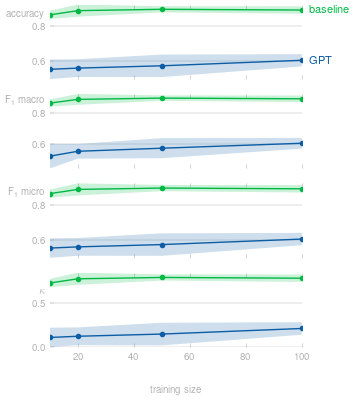

In [38]:

with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[2,:].index,
            grouped_res.loc[2,:][metric]['mean'],
            marker='o',
            label='GPT',
        )
        ax[i].fill_between(
            grouped_res.loc[2,:].index,
            grouped_res.loc[2,:][metric]['mean'] - grouped_res.loc[2,:][metric]['std'],
            grouped_res.loc[2,:][metric]['mean'] + grouped_res.loc[2,:][metric]['std'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_baseline_res.loc[2,:].index,
            grouped_baseline_res.loc[2,:][metric]['mean'],
            marker='o',
            label='baseline'
        )
        ax[i].fill_between(
            grouped_baseline_res.loc[2,:].index,
            grouped_baseline_res.loc[2,:][metric]['mean'] - grouped_baseline_res.loc[2,:][metric]['std'],
            grouped_baseline_res.loc[2,:][metric]['mean'] + grouped_baseline_res.loc[2,:][metric]['std'],
            alpha=0.2,
        )


    ax[-1].set_xlabel('training size')
    #ax[0].legend()
    

    matplotx.line_labels(ax[0], fontsize=8) 
    

    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])

    #fig.tight_layout()
    fig.savefig('cv-classification_results_2.pdf', bbox_inches='tight')

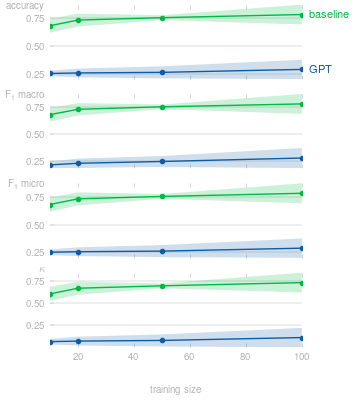

In [39]:
    
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

# plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[5,:].index,
            grouped_res.loc[5,:][metric]['mean'],
            marker='o',
            label='GPT',
        )
        ax[i].fill_between(
            grouped_res.loc[5,:].index,
            grouped_res.loc[5,:][metric]['mean'] - grouped_res.loc[5,:][metric]['std'],
            grouped_res.loc[5,:][metric]['mean'] + grouped_res.loc[5,:][metric]['std'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_baseline_res.loc[5,:].index,
            grouped_baseline_res.loc[5,:][metric]['mean'],
            marker='o',
            label='baseline'
        )
        ax[i].fill_between(
            grouped_baseline_res.loc[5,:].index,
            grouped_baseline_res.loc[5,:][metric]['mean'] - grouped_baseline_res.loc[5,:][metric]['std'],
            grouped_baseline_res.loc[5,:][metric]['mean'] + grouped_baseline_res.loc[5,:][metric]['std'],
            alpha=0.2,
        )



    matplotx.line_labels(ax[0], fontsize=8)

    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('training size')

fig.savefig('cv-classification_results_5.pdf', bbox_inches='tight')